In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

%matplotlib inline
from sklearn import model_selection, metrics,preprocessing
from sklearn.metrics import f1_score, r2_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.externals import joblib
import itertools

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
df = pd.read_csv('../../Progetto/metadata/segugio_X.csv', low_memory=False)

In [118]:
sum(df['labels']==1)/sum(df['labels']==0)

0.005424257040032649

In [4]:
df_nan_values=pd.isnull(df).sum()
df_nan_values.where(df_nan_values>121496).dropna()
df.fillna(-1000, inplace=True)
df.replace('None', -1000, inplace=True)

In [4]:
df.columns.values.tolist()

['codice_ruolo_x',
 'latitudine_nascita_x',
 'longitudine_nascita_x',
 'codice_provincia_nascita_x',
 'codice_nazione_x',
 'len_codice_identificativo_x',
 'codice_stato_civile_x',
 'codice_sesso_x',
 'codice_professione_x',
 'data_nascita_x',
 'codice_titolo_studio_x',
 'latitudine_residenza_x',
 'longitudine_residenza_x',
 'codice_provincia_residenza_x',
 'data_rilascio_patente_x',
 'codice_ruolo_y',
 'latitudine_nascita_y',
 'longitudine_nascita_y',
 'codice_provincia_nascita_y',
 'codice_nazione_y',
 'len_codice_identificativo_y',
 'codice_stato_civile_y',
 'codice_sesso_y',
 'codice_professione_y',
 'data_nascita_y',
 'codice_titolo_studio_y',
 'latitudine_residenza_y',
 'longitudine_residenza_y',
 'codice_provincia_residenza_y',
 'data_rilascio_patente_y',
 'data_scadenza_contratto',
 'codice_compagnia_assicurazione_provenienza',
 'indicatore_classe_agevolata',
 'nuova_immatricolazione',
 'codice_tipo_targa',
 'codice_nazione_targa',
 'codice_marca',
 'codice_modello',
 'codice_al

In [5]:
df_categorical=df[{"codice_titolo_studio_x","codice_titolo_studio_y","codice_tipo_alimentazione","codice_tipo_targa","len_codice_identificativo_x","len_codice_identificativo_y","01/02/2018","01/08/2018","codice_ricovero_veicolo","codice_tipo_antifurto","codice_uso_principale_veicolo","distanza_ultimo_sinistro","indicatore_guidaesperta","neo_assicurato","codice_ruolo_x","codice_tipo_targa","indicatore_classe_agevolata","nuova_immatricolazione","13","19","3058","3059","3060","3063","3068","3591","3592","3794","42","57","5E","5L","5M","5N","8J","8K","8P","X4","indicatore_clausola_scelta_3679","codice_sesso_x","codice_sesso_y","codice_stato_civile_x","codice_stato_civile_y","codice_ruolo_x","codice_ruolo_y","data_inizio_edizione_sconto"}]
print(df_categorical.shape)

(135496, 44)


In [6]:
def normalize(df):
    x = df.values #returns a numpy array
    standard_scaler = preprocessing.StandardScaler()
    x_scaled = standard_scaler.fit_transform(x)
    df_norm = pd.DataFrame(x_scaled)
    df_norm.columns = df.columns
    return df_norm

In [7]:
df_norm = normalize(df)

In [9]:
y=df['labels'].values
only_features=df.drop(["labels"],axis=1)
X=only_features.values

In [10]:
x_scaled = df_norm.values
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
X_new = sel.fit_transform(X)

print (X_new.shape)
mask = sel.get_support() 
new_features = [] 

for bool, feature in zip(mask, df.columns):
    if bool:
        new_features.append(feature)


(135496, 96)


In [11]:
df_var_1 = pd.DataFrame(X_new,columns=new_features)
df_var_1['labels'] = df['labels']

In [12]:
y_2=df_var_1['labels'].values
only_features_2=df_var_1.drop(["labels"],axis=1)
X_2=only_features_2.values


In [13]:
sel = VarianceThreshold(threshold=0.1)
X_new = sel.fit_transform(X_2)

print (X_new.shape)
mask = sel.get_support() 
new_features = [] 

for bool, feature in zip(mask, df_var_1.columns):
    if bool:
        new_features.append(feature)

(135496, 72)


In [14]:
df_var_2 = pd.DataFrame(X_new,columns=new_features)
df_var_2['labels'] = df_var_1['labels']
#df_var = df[new_features].copy()
print (df_var_2.shape)
df_var_2.head()

(135496, 73)


,latitudine_nascita_x,longitudine_nascita_x,codice_provincia_nascita_x,codice_nazione_x,len_codice_identificativo_x,codice_stato_civile_x,codice_sesso_x,codice_professione_x,data_nascita_x,codice_titolo_studio_x,...,neo_assicurato,numero_anni_NA,data_ora_inserimento_preventivo,data_emissione,data_decorrenza,data_scadenza,codice_sconto_nodo,indicatore_guidaesperta,conto_preventivi,labels
0,44.663266,10.883767,57.0,67.0,16.0,5.0,0.0,10.0,635.0,5.0,...,1.0,2.0,154.0,342.0,211.0,-154.0,549148.0,1.0,1.0,0
1,45.064440,7.687378,97.0,67.0,16.0,5.0,0.0,137.0,534.0,3.0,...,0.0,0.0,154.0,342.0,241.0,-124.0,691.0,1.0,1.0,0
2,40.877993,14.275841,-1000.0,67.0,16.0,6.0,0.0,1.0,510.0,3.0,...,0.0,0.0,154.0,342.0,226.0,-139.0,311871.0,1.0,1.0,0
3,46.000000,25.000000,31.0,111.0,16.0,2.0,1.0,1.0,519.0,2.0,...,0.0,0.0,154.0,342.0,225.0,-140.0,30779.0,1.0,1.0,0
4,41.562164,14.658943,20.0,67.0,16.0,6.0,0.0,1.0,296.0,3.0,...,1.0,2.0,154.0,342.0,226.0,-139.0,1185.0,0.0,1.0,0


In [15]:
columns_low_var_2=[]
columns_high_var_2=[]
columns_high_var_2=df_var_2.columns.values.tolist()
df_low_var_2=df_var_1.drop(columns_high_var_2,axis=1)

In [16]:
columns_low_var_2=[]
columns_low_var_2=df_low_var_2.columns.values.tolist()
columns_categorical=[]
columns_categorical=df_categorical.columns.values.tolist()


In [17]:
for col in columns_low_var_2:
    if(col not in columns_categorical):
        print(col,"not found")
        columns_categorical.append(col)
    
  

indicatore_presenza_airbag not found
01/08/2017 not found


In [18]:
columns_var_2=df_var_2.columns.values.tolist()
for col in columns_categorical:
    if(col in columns_var_2):
        print(col,"found")
        columns_var_2.remove(col)

len_codice_identificativo_x found
indicatore_guidaesperta found
codice_tipo_targa found
codice_ricovero_veicolo found
distanza_ultimo_sinistro found
codice_stato_civile_y found
codice_uso_principale_veicolo found
codice_sesso_y found
codice_stato_civile_x found
indicatore_clausola_scelta_3679 found
codice_ruolo_y found
indicatore_classe_agevolata found
codice_sesso_x found
01/08/2018 found
01/02/2018 found
codice_titolo_studio_y found
codice_tipo_antifurto found
neo_assicurato found
data_inizio_edizione_sconto found
codice_titolo_studio_x found
codice_tipo_alimentazione found
len_codice_identificativo_y found


In [19]:
df_var=df[columns_var_2]
df_var=df_var.drop("labels",axis=1)
df_var.head()

,latitudine_nascita_x,longitudine_nascita_x,codice_provincia_nascita_x,codice_nazione_x,codice_professione_x,data_nascita_x,latitudine_residenza_x,longitudine_residenza_x,codice_provincia_residenza_x,data_rilascio_patente_x,...,percentuale_sconto_applicato,percentuale_sconto_aggregatore,numero_incidenti,numero_anni_NA,data_ora_inserimento_preventivo,data_emissione,data_decorrenza,data_scadenza,codice_sconto_nodo,conto_preventivi
0,44.663266,10.883767,57.0,67.0,10.0,635.0,39.256404,9.159333,19.0,409.0,...,-1000.0,35.00000,0.0,2.0,154.0,342.0,211.0,-154.0,549148.0,1
1,45.064440,7.687378,97.0,67.0,137.0,534.0,45.064440,7.687378,97.0,313.0,...,-1000.0,24.64840,0.0,0.0,154.0,342.0,241.0,-124.0,691.0,1
2,40.877993,14.275841,-1000.0,67.0,1.0,510.0,45.640205,9.467236,52.0,289.0,...,-1000.0,17.82571,0.0,0.0,154.0,342.0,226.0,-139.0,311871.0,1
3,46.000000,25.000000,31.0,111.0,1.0,519.0,45.493105,9.329438,55.0,289.0,...,-1000.0,34.45425,0.0,0.0,154.0,342.0,225.0,-140.0,30779.0,1
4,41.562164,14.658943,20.0,67.0,1.0,296.0,44.685404,10.668794,81.0,61.0,...,-1000.0,33.61130,0.0,2.0,154.0,342.0,226.0,-139.0,1185.0,1


In [20]:
corr0 = df_var.corr()
def plot_corr(df, size=10, cmap=plt.cm.viridis):
    
    fig, ax = plt.subplots(figsize=(size, size))
    pl = ax.matshow(df,cmap=cmap)
    plt.tick_params(labelsize=8)
    plt.xticks(range(len(df.columns)), df.columns, rotation=90)
    plt.yticks(range(len(df.columns)), df.columns)
    plt.colorbar(pl)

In [21]:
def high_corr_remover(correlation_df, ref_df, limit=0.85):
    to_remove = []
    correlation_df.dropna(how='all', axis=0, inplace=True)
    correlation_df.dropna(how='all', axis=1, inplace=True)
    
    for col in correlation_df.columns:
        temp = correlation_df[col].where(correlation_df[col].map(abs) >= limit).dropna().index.tolist()
        temp.remove(col)
        if temp != []:
            to_remove.extend(temp)
    
#     to_remove.remove('labels')
    ref_df.drop(np.unique(to_remove), axis=1, inplace=True)
    correlation_df.drop(np.unique(to_remove), axis=1, inplace=True)
    correlation_df.drop(np.unique(to_remove), axis=0, inplace=True)

In [22]:
high_corr_remover(corr0, df_var)

In [23]:
df_var.shape

(135496, 24)

In [24]:
#prepare dataframe 
col_tot=[]
for col in df_var.columns.values.tolist():
    col_tot.append(col)
    
for col in columns_categorical:
    col_tot.append(col)
    
print(col_tot)

['latitudine_nascita_x', 'longitudine_nascita_x', 'codice_provincia_nascita_x', 'latitudine_residenza_x', 'longitudine_residenza_x', 'codice_provincia_residenza_x', 'data_scadenza_contratto', 'codice_compagnia_assicurazione_provenienza', 'codice_marca', 'codice_modello', 'data_ultima_voltura', 'numero_potenza_kw', 'numero_cilindrata', 'importo_valore_assicurato', 'numero_chilometri_medi_annui', 'codice_classe_merito_interna', 'codice_classe_merito_esterna', 'importo_premio_cvt', 'percentuale_sconto_applicato', 'numero_incidenti', 'numero_anni_NA', 'data_emissione', 'codice_sconto_nodo', 'conto_preventivi', 'len_codice_identificativo_x', 'indicatore_guidaesperta', 'codice_tipo_targa', 'codice_ricovero_veicolo', 'distanza_ultimo_sinistro', '8K', '5N', '3059', 'nuova_immatricolazione', 'codice_stato_civile_y', 'codice_ruolo_x', 'codice_uso_principale_veicolo', 'codice_sesso_y', '3068', 'codice_stato_civile_x', '3058', '3063', 'indicatore_clausola_scelta_3679', 'codice_ruolo_y', 'indicator

In [25]:
df_tot=df[col_tot]
df_tot.shape

(135496, 70)

In [26]:
from sklearn.model_selection import train_test_split
y=df['labels']
X=df_tot

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.1, random_state=2)


In [25]:
X_train.shape

(121946, 70)

In [109]:
sum(y_train==1)

439

In [115]:
sum(y_train==0)

80859

In [116]:
sum(y_test==1)

73

In [117]:
sum(y_test==0)

13477

In [113]:
sum(y_test==1)/y_test.shape[0]

0.005387453874538746

In [120]:
(sum(y_train==1)/y_train.shape[0])

0.0053998868360845284

In [110]:
sum(y_train==0)

80859

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train,test_size=40648, random_state=2)

In [27]:
X_train.shape

(81298, 70)

In [28]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_train_resample, y_train_resample = sm.fit_sample(X_train, y_train)

print(sorted(Counter(y_train_resample).items()))

[(0, 80859), (1, 80859)]


In [133]:
X_train_resample

array([[   41.97236894,    12.43690266,    84.        , ...,
            0.        ,     1.        ,     0.        ],
       [   40.87799298,    14.27584136, -1000.        , ...,
            0.        ,     1.        ,     0.        ],
       [   41.97236894,    12.43690266,    84.        , ...,
            0.        ,     1.        ,     0.        ],
       ...,
       [   38.01395256,    15.11962932,   -73.80981283, ...,
            0.        ,     1.        ,     0.        ],
       [   41.82741635,    13.57539766, -1000.        , ...,
            0.        ,     1.        ,     1.4566869 ],
       [   35.91767142,    16.66444402,    58.33841947, ...,
            0.        ,     1.        ,     0.        ]])

In [29]:
sm = SMOTE(random_state=42)
X_val_resample, y_val_resample = sm.fit_sample(X_val, y_val)

print(sorted(Counter(y_val_resample).items()))

[(0, 40429), (1, 40429)]


In [123]:
w=round(0.0054*sum(y_train_resample==0))
w

437.0

In [29]:


from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score,GridSearchCV 
classifier = RandomForestClassifier(random_state=0,oob_score=True) 
#devo riprovare mettendo oob_score=True
#w=round(0.0054*sum(y_train==0))
grid_param = {  
    'n_estimators':[500,800,1000],
    'criterion': ['gini','entropy'],
    
    'bootstrap': [True]
}


gd_sr = GridSearchCV(estimator=classifier,  
                     param_grid=grid_param,
                     scoring='accuracy',
                     cv=5,
                     n_jobs=-1,verbose=True)

In [30]:
fitted_model=gd_sr.fit(X_train_resample, y_train_resample)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 79.0min finished


In [31]:
rf=gd_sr.best_estimator_
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [32]:
rf.fit(X_val_resample,y_val_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [33]:
print(gd_sr.best_score_)

0.9973224996599018


In [34]:
rand_best_model_pred=rf.predict(X_test)

In [35]:
errors = abs(rand_best_model_pred - y_test)

In [36]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.01


In [37]:
r2_score(y_test,rand_best_model_pred)

-0.14314494201689176

In [38]:
confusion_matrix(y_test,rand_best_model_pred)

array([[13462,    15],
       [   68,     5]], dtype=int64)

In [39]:
f1_score(y_test,rand_best_model_pred)

0.10752688172043011

In [42]:
rf.oob_score_

0.9977491404684756

In [40]:

from sklearn.tree import export_graphviz
import pydot

tree = rf.estimators_[5]

export_graphviz(tree, out_file = 'tree.dot', feature_names = X_train.columns.values.tolist(), rounded = True, precision = 1)

(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

In [ ]:

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)

tree_small = rf_small.estimators_[5]

export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = X_train.columns.values.tolist() , rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

Feature ranking:
1. feature 18 (0.138734)
2. feature 10 (0.064423)
3. feature 38 (0.055816)
4. feature 59 (0.048319)
5. feature 31 (0.044376)
6. feature 35 (0.042898)
7. feature 49 (0.042251)
8. feature 46 (0.041371)
9. feature 43 (0.040570)
10. feature 15 (0.040219)
11. feature 23 (0.038409)
12. feature 28 (0.034355)
13. feature 34 (0.024575)
14. feature 3 (0.020537)
15. feature 32 (0.019806)
16. feature 17 (0.017983)
17. feature 69 (0.017629)
18. feature 19 (0.016549)
19. feature 55 (0.016083)
20. feature 22 (0.015580)
21. feature 7 (0.013564)
22. feature 64 (0.013451)
23. feature 6 (0.012506)
24. feature 57 (0.012348)
25. feature 20 (0.012217)
26. feature 0 (0.012206)
27. feature 66 (0.011119)
28. feature 58 (0.011025)
29. feature 9 (0.010081)
30. feature 12 (0.009946)
31. feature 8 (0.009599)
32. feature 11 (0.008980)
33. feature 13 (0.008445)
34. feature 1 (0.008211)
35. feature 2 (0.008055)
36. feature 16 (0.007759)
37. feature 5 (0.007668)
38. feature 21 (0.007558)
39. feature 6

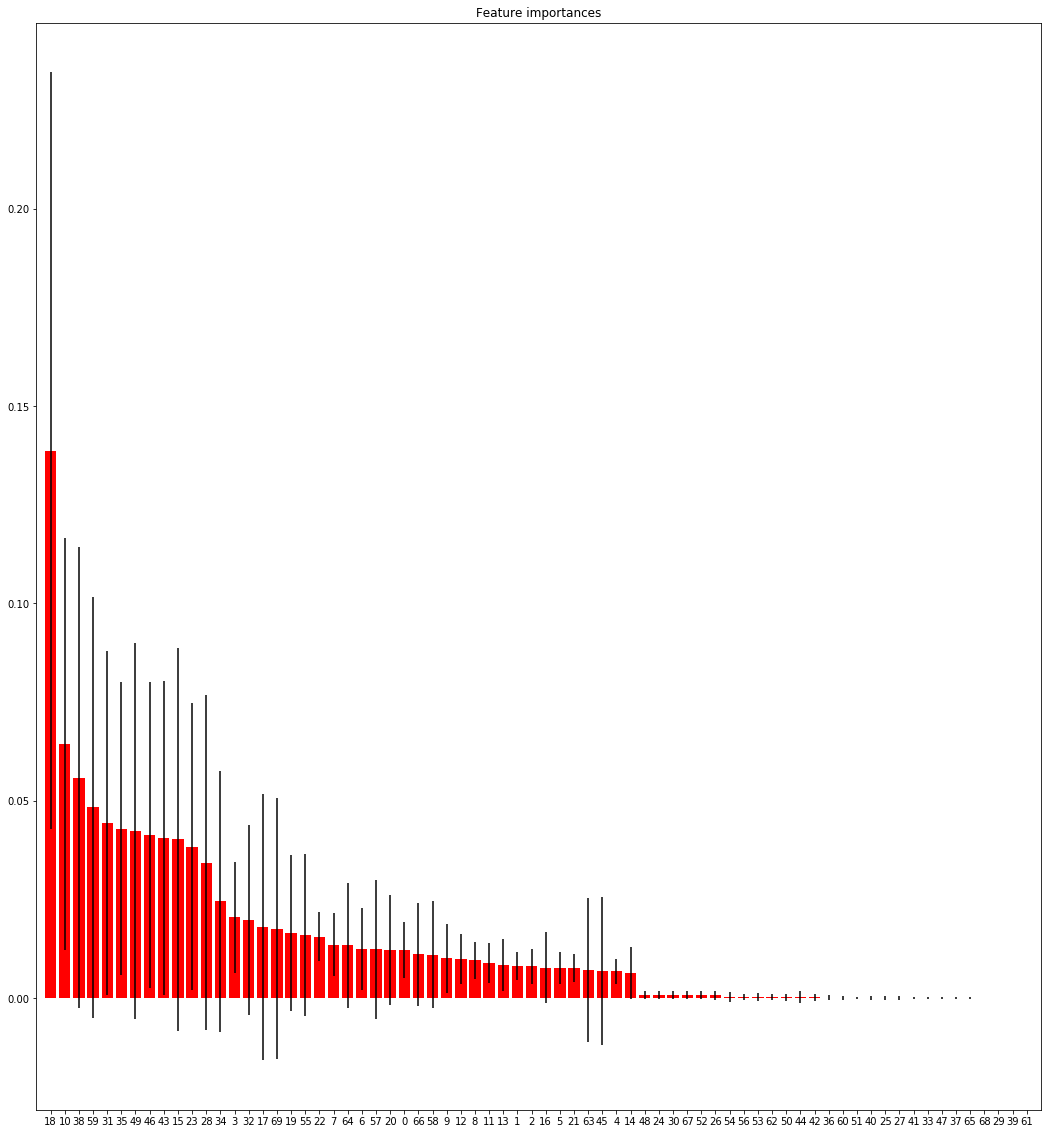

In [41]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_val_resample.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,20))
plt.title("Feature importances")
plt.bar(range(X_val_resample.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])


plt.show()


In [45]:
plt.savefig('features_importance.png')

<Figure size 432x288 with 0 Axes>

In [46]:
indices

array([18, 10, 46, 56, 64, 27, 43, 15, 42, 59, 23, 45, 44,  3, 41, 17, 19,
       22, 69, 32,  7, 20, 37,  0, 61,  6, 34, 47,  9, 12,  8, 11, 13,  2,
       21,  1,  5, 16,  4, 14, 51, 24, 63, 58, 31, 62, 57, 25, 30, 26, 55,
       29, 66, 50, 40, 36, 65, 38, 33, 48, 54, 60, 49, 28, 67, 35, 68, 53,
       52, 39], dtype=int64)

In [42]:
columns_t=df_tot.columns.values.tolist()
sorted_features_im=[]
for i in range(len(indices)):
    sorted_features_im.append(columns_t[indices[i]])
    
    
    

In [43]:
sorted_features_im


['percentuale_sconto_applicato',
 'data_ultima_voltura',
 'neo_assicurato',
 'codice_sesso_x',
 '01/02/2018',
 'codice_titolo_studio_x',
 'distanza_ultimo_sinistro',
 'codice_stato_civile_x',
 '01/08/2018',
 'codice_classe_merito_interna',
 'conto_preventivi',
 'indicatore_classe_agevolata',
 'codice_tipo_alimentazione',
 'latitudine_residenza_x',
 'codice_ricovero_veicolo',
 'importo_premio_cvt',
 '01/08/2017',
 'numero_incidenti',
 'data_inizio_edizione_sconto',
 'codice_sconto_nodo',
 'codice_compagnia_assicurazione_provenienza',
 'codice_uso_principale_veicolo',
 'data_scadenza_contratto',
 'indicatore_clausola_scelta_3679',
 'numero_anni_NA',
 'latitudine_nascita_x',
 'codice_tipo_antifurto',
 'indicatore_guidaesperta',
 'codice_modello',
 'numero_cilindrata',
 'codice_marca',
 'numero_potenza_kw',
 'importo_valore_assicurato',
 'longitudine_nascita_x',
 'codice_provincia_nascita_x',
 'codice_classe_merito_esterna',
 'codice_provincia_residenza_x',
 'data_emissione',
 '19',
 '13',

In [44]:
columns_imp_features=[]
for i in range(len(indices)):
    if(importances[indices[i]]>0.006):
        columns_imp_features.append(columns_t[indices[i]])
        

In [45]:
df_tr=X_train[columns_imp_features]
df_tr.shape

(81298, 42)

In [63]:
X_train_resample.shape

(161718, 70)

In [62]:
X_train_new.shape

(161718, 41)

In [57]:
X_train_resample.shape[0]

161718

In [46]:
X_train_new=np.zeros((X_train_resample.shape[0],len(columns_imp_features)))
                     
for k in range(X_train_resample.shape[0]):
    for j in range(len(columns_imp_features)):
        X_train_new[k][j]=X_train_resample[k][indices[j]]
       

In [47]:
X_val_new=np.zeros((X_val_resample.shape[0],len(columns_imp_features)))
for k in range(X_val_resample.shape[0]):
    for j in range(len(columns_imp_features)):
        X_val_new[k][j]=X_val_resample[k][indices[j]]


In [48]:
X_test_new=np.zeros((X_test.shape[0],len(columns_imp_features)))
X_test_ar=X_test.values
for k in range(X_test.shape[0]):
    for j in range(len(columns_imp_features)):
        X_test_new[k][j]=X_test_ar[k][indices[j]]



In [51]:
X_test.shape

(13550, 70)

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('classifier' , LogisticRegression(random_state=42))])


param_grid = [
    {'classifier' : [LogisticRegression(random_state=42)],
     'classifier__penalty' : ['l1', 'l2'],
    'classifier__C' : np.logspace(-4, 4, 20),
    'classifier__solver' : ['liblinear']}]

clf = GridSearchCV(pipe,param_grid = param_grid, cv = 5, verbose=True, n_jobs=-1)


In [76]:
fitted_model_logistic=clf.fit(X_train_new, y_train_resample)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 103.7min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 106.5min finished


In [78]:
best_model=clf.best_estimator_
best_model

Pipeline(memory=None,
     steps=[('classifier', LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False))])

In [79]:
clf.best_score_

0.8003438083577585

In [80]:
best_model=LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [81]:
best_model.fit(X_val_new,y_val_resample)

LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [84]:
prediction_logistic=best_model.predict(X_test_new)

In [85]:
errors = abs(prediction_logistic - y_test)

In [86]:
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.15


In [87]:
confusion_matrix(y_test,prediction_logistic)

array([[11519,  1958],
       [   33,    40]], dtype=int64)

In [88]:
f1_score(y_test,prediction_logistic)

0.03862868179623371

In [91]:
r2_score(y_test,prediction_logistic)

-26.421705777778694

In [93]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,prediction_logistic )
print('AUC: %.3f' % auc)

AUC: 0.701


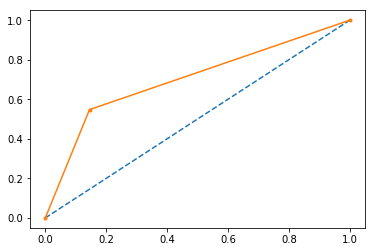

In [104]:
fpr, tpr, thresholds = roc_curve(y_test,prediction_logistic )

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(fpr, tpr, marker='.')

plt.show()

In [106]:
fpr

array([0.        , 0.14528456, 1.        ])

In [138]:
X_train_new.shape

(161718, 41)

In [54]:
X_val_new.shape

(80858, 42)

In [53]:
X_t.shape

(242576, 42)

In [50]:
X_t=np.concatenate((X_train_new,X_val_new),axis=0)

In [51]:
standard_scaler = preprocessing.StandardScaler()
X_scaled = standard_scaler.fit_transform(X_t)

In [52]:
X_train_scal=X_scaled[:X_train_new.shape[0],:]
X_train_scal.shape

(161718, 42)

In [55]:
X_val_scal=X_scaled[X_train_new.shape[0]:,:]
X_val_scal.shape

(80858, 41)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
C_range = np.logspace(-2, 10, 6)
gamma_range = np.logspace(-9, 3, 6)
parameters = {'kernel':('linear', 'rbf'), 'C':C_range,'gamma': gamma_range}
clf_svm = GridSearchCV(svm, parameters,cv = 5, verbose=True, n_jobs=-1)
clf_svm.fit(X_train_scal,y_train_resample)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [42]:
best_model_svm=clf_svm.best_estimator_
best_model_svm.fit(X_val_scal,y_val_resample)

In [30]:
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import cross_val_score,GridSearchCV 
model_rf=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [31]:
model_rf.fit(X_val_resample,y_val_resample)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

In [33]:
prediction_rf_no_cv=model_rf.predict(X_test)

*random forest for features selection and svm classifier*

Feature ranking:
1. feature 18 (0.140402)
2. feature 10 (0.061209)
3. feature 59 (0.057518)
4. feature 45 (0.050281)
5. feature 28 (0.045353)
6. feature 50 (0.044357)
7. feature 52 (0.044032)
8. feature 64 (0.042393)
9. feature 38 (0.041499)
10. feature 15 (0.038751)
11. feature 23 (0.036191)
12. feature 43 (0.030717)
13. feature 65 (0.023960)
14. feature 3 (0.020055)
15. feature 27 (0.019628)
16. feature 17 (0.018813)
17. feature 69 (0.016990)
18. feature 19 (0.016939)
19. feature 62 (0.016332)
20. feature 22 (0.015739)
21. feature 35 (0.013490)
22. feature 7 (0.012851)
23. feature 0 (0.012558)
24. feature 25 (0.012422)
25. feature 20 (0.012275)
26. feature 6 (0.011977)
27. feature 57 (0.011832)
28. feature 41 (0.011797)
29. feature 9 (0.010435)
30. feature 8 (0.010048)
31. feature 12 (0.010012)
32. feature 11 (0.009037)
33. feature 13 (0.008446)
34. feature 2 (0.008069)
35. feature 1 (0.008066)
36. feature 5 (0.007478)
37. feature 21 (0.007401)
38. feature 16 (0.007074)
39. feature 4

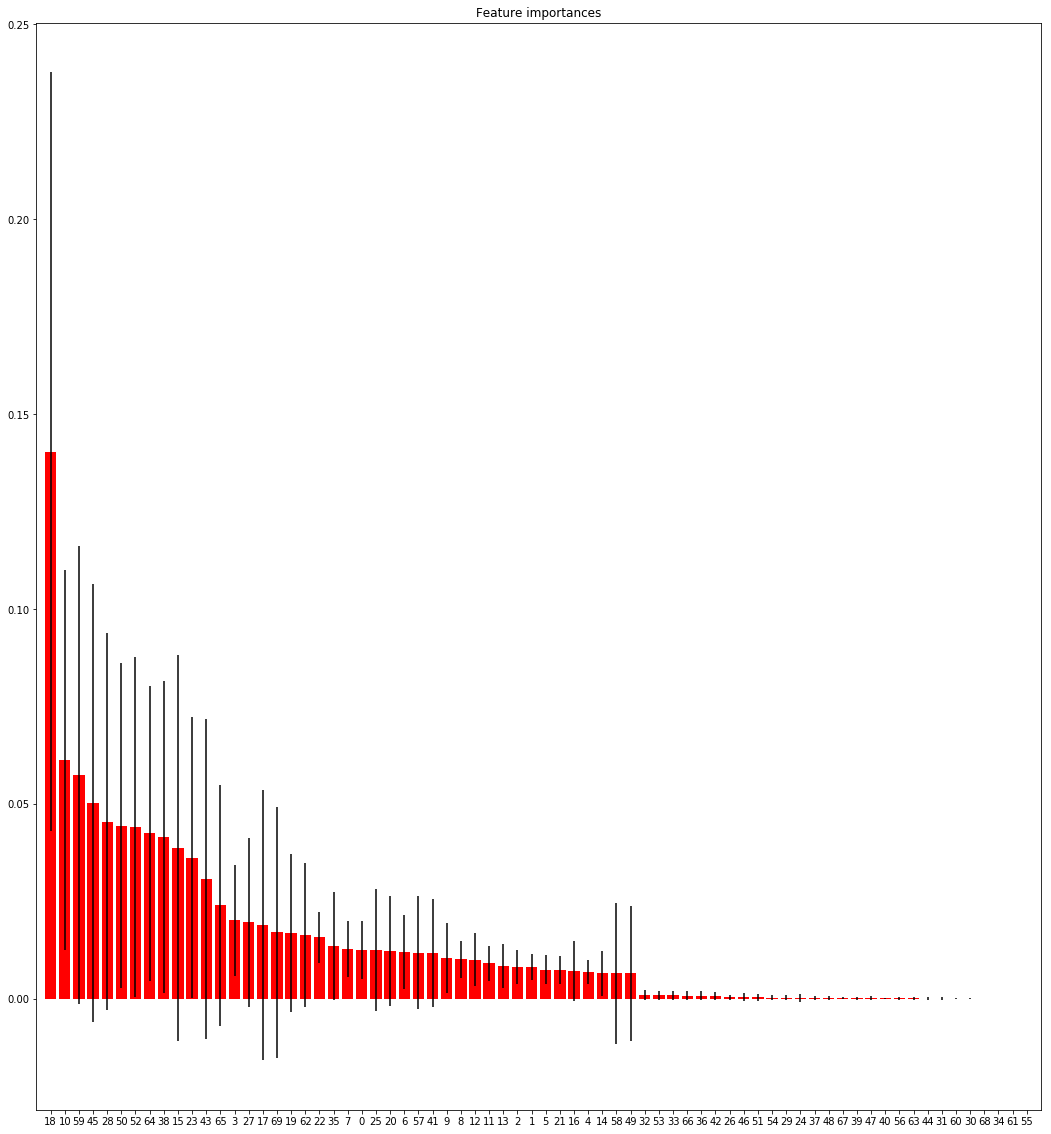

In [36]:
importances =model_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in model_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_val_resample.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(18,20))
plt.title("Feature importances")
plt.bar(range(X_val_resample.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_val_resample.shape[1]), indices)
plt.xlim([-1, X.shape[1]])


plt.show()


In [37]:
columns_t=df_tot.columns.values.tolist()
sorted_features_im=[]
for i in range(len(indices)):
    sorted_features_im.append(columns_t[indices[i]])
    
    

In [38]:
columns_imp_features=[]
for i in range(len(indices)):
    if(importances[indices[i]]>0.006):
        columns_imp_features.append(columns_t[indices[i]])
        

In [39]:
X_train_new=np.zeros((X_train_resample.shape[0],len(columns_imp_features)))
                     
for k in range(X_train_resample.shape[0]):
    for j in range(len(columns_imp_features)):
        X_train_new[k][j]=X_train_resample[k][indices[j]]
       

In [40]:
X_val_new=np.zeros((X_val_resample.shape[0],len(columns_imp_features)))
for k in range(X_val_resample.shape[0]):
    for j in range(len(columns_imp_features)):
        X_val_new[k][j]=X_val_resample[k][indices[j]]


In [41]:
X_t=np.concatenate((X_train_new,X_val_new),axis=0)
standard_scaler = preprocessing.StandardScaler()
X_scaled = standard_scaler.fit_transform(X_t)


In [42]:
X_train_scal=X_scaled[:X_train_new.shape[0],:]
X_train_scal.shape

(161718, 42)

In [43]:
X_val_scal=X_scaled[X_train_new.shape[0]:,:]
X_val_scal.shape

(80858, 42)

In [ ]:
from sklearn.svm import SVC
svm = SVC()
C_range = np.logspace(-2, 10, 6)
gamma_range = np.logspace(-9, 3, 6)
parameters = {'gamma': gamma_range,'C':C_range}
clf_svm = GridSearchCV(svm, parameters, verbose=True, n_jobs=-1)
clf_svm.fit(X_train_scal,y_train_resample)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
